In [1]:
import pandas as pd
import math

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np

random_seed = 42

## Load data

In [2]:
df = pd.read_csv('../data/alkanes_with_zagreb.csv', sep=';')

In [3]:
df['M1_log'] = df.M1.apply(math.log)
df['M2_log'] = df.M2.apply(math.log)
df.head(2)

,name,boiling_point,SMILES,IUPAC_name,CID,molecular_formula,M1,M2,InChIKey,num_atoms,M1_log,M2_log
0,Butane,-0.5,CCCC,butane,7843,C4H10,10,8,IJDNQMDRQITEOD-UHFFFAOYSA-N,4,2.302585,2.079442
1,Dodecane,216.3,CCCCCCCCCCCC,dodecane,8182,C12H26,42,40,SNRUBQQJIBEYMU-UHFFFAOYSA-N,12,3.737670,3.688879


## M1 and M2 comparison

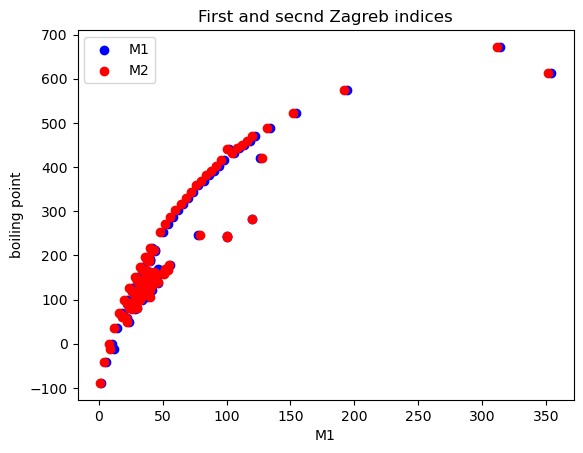

In [5]:
classes = ['M1', 'M2']
plt.scatter(df.M1, df.boiling_point, color='blue', label='M1', marker='o')
plt.scatter(df.M2, df.boiling_point, color='red', label='M2', marker='o')
plt.legend()
plt.xlabel("M1")
plt.title("First and secnd Zagreb indices")
plt.ylabel("boiling point")
plt.show()

In [6]:
correlation = df['M1'].corr(df['M2'])
print("M1 and M2 correlation: ", correlation)

M1 and M2 correlation:  0.9991802507380935


# Branched and linear comparison

In [7]:
df_chains = df[~df['SMILES'].str.contains(r'\(')]
df_linear = df[df['SMILES'].str.contains(r'\(')]

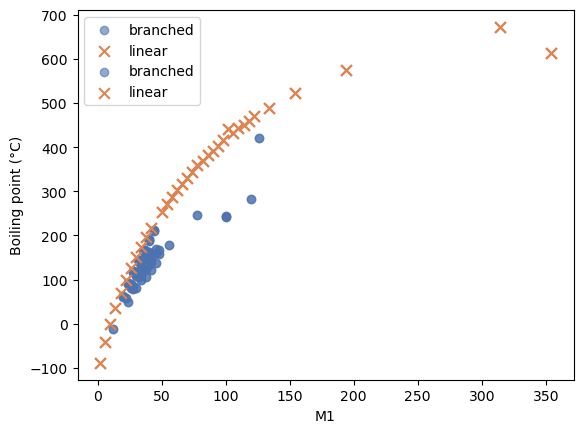

In [9]:
plt.scatter(df_linear.M1, df_linear.boiling_point, color='#4C72B0', label='branched', marker='o', alpha=0.6)
plt.scatter(df_chains.M1, df_chains.boiling_point, color='#DD8452', label='linear', marker='x', s=60, alpha=1)
plt.xlabel("M1")
plt.ylabel("Boiling point (°C)")
# plt.title("Chains and branched alkanes")es")
# plt.scatter(df.M2, df.boiling_point, color='red', label='M2')

plt.legend()
plt.savefig("../img/sc_linear_vs_chains_M1.svg", format="svg")
plt.show()

# Predictions

In [10]:
df_train, df_val = train_test_split(df, test_size=0.3, random_state=random_seed)

In [12]:
reg = LinearRegression()
reg.fit(df_train[['M1_log']], df_train['boiling_point'])

LinearRegression()

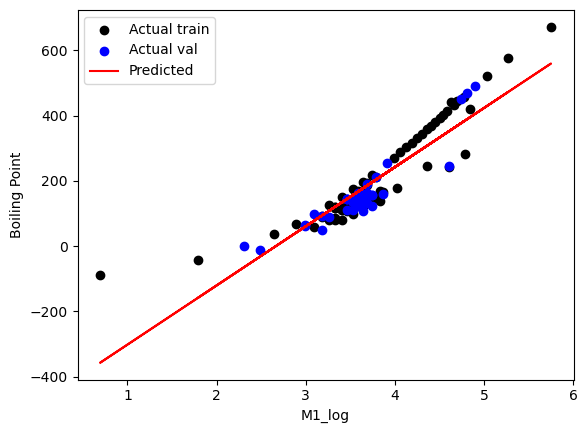

In [13]:
predicted_boiling_points = reg.predict(df_train[['M1_log']])
plt.scatter(df_train['M1_log'], df_train['boiling_point'], color='black', label='Actual train')
plt.scatter(df_val['M1_log'], df_val['boiling_point'], color='blue', label='Actual val')

plt.plot(df_train['M1_log'], predicted_boiling_points, color='red', label='Predicted')
plt.xlabel('M1_log')
plt.ylabel('Boiling Point')
plt.legend()
plt.show()

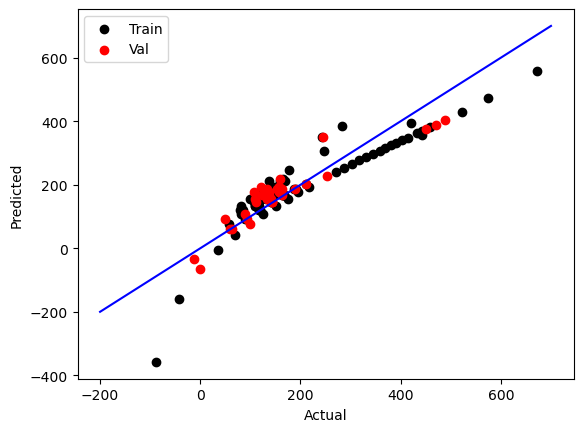

In [14]:
pred_train = reg.predict(df_train[['M1_log']])
pred_val = reg.predict(df_val[['M1_log']])
plt.scatter(df_train['boiling_point'], pred_train, color='black', label='Train')
plt.scatter(df_val['boiling_point'], pred_val, color='red', label='Val')
plt.plot([-200,700], [-200,700], 'b')
# plt.plot(df_train['M1_log'], predicted_boiling_points, color='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

### M1 and number of atoms

In [15]:
reg2 = LinearRegression()
reg2.fit(df_train[['M1_log', 'num_atoms']], df_train['boiling_point'])

LinearRegression()

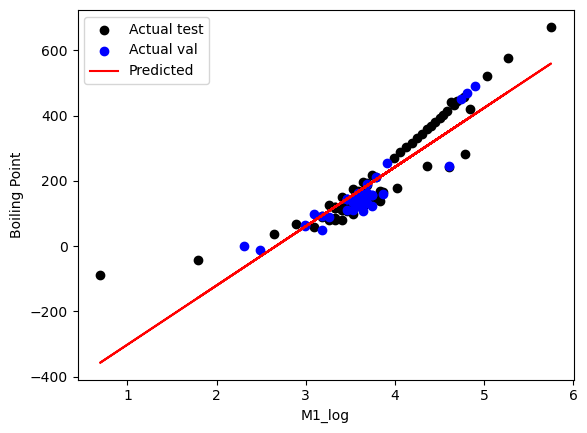

In [16]:
predicted_boiling_points_2 = reg2.predict(df_train[['M1_log', 'num_atoms']])
plt.scatter(df_train['M1_log'], df_train['boiling_point'], color='black', label='Actual test')
plt.scatter(df_val['M1_log'], df_val['boiling_point'], color='blue', label='Actual val')

plt.plot(df_train['M1_log'], predicted_boiling_points, color='red', label='Predicted')
plt.xlabel('M1_log')
plt.ylabel('Boiling Point')
plt.legend()
plt.show()

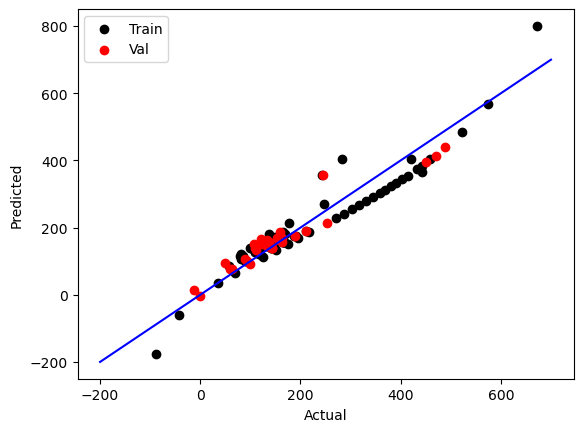

In [17]:
pred_train_2 = reg2.predict(df_train[['M1_log', 'num_atoms']])
pred_val_2 = reg2.predict(df_val[['M1_log', 'num_atoms']])
plt.scatter(df_train['boiling_point'], pred_train_2, color='black', label='Train')
plt.scatter(df_val['boiling_point'], pred_val_2, color='red', label='Val')
plt.plot([-200,700], [-200,700], 'b')
# plt.plot(df_train['M1_log'], predicted_boiling_points, color='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

## Only chains

In [19]:
df_chains = df_chains.copy()
df_chains['atom_count_log'] = df_chains.num_atoms.apply(math.log)
df_chains.head()

,name,boiling_point,SMILES,IUPAC_name,CID,molecular_formula,M1,M2,InChIKey,num_atoms,M1_log,M2_log,atom_count_log
0,Butane,-0.5,CCCC,butane,7843,C4H10,10,8,IJDNQMDRQITEOD-UHFFFAOYSA-N,4,2.302585,2.079442,1.386294
1,Dodecane,216.3,CCCCCCCCCCCC,dodecane,8182,C12H26,42,40,SNRUBQQJIBEYMU-UHFFFAOYSA-N,12,3.737670,3.688879,2.484907
2,Propane,-42.1,CCC,propane,6334,C3H8,6,4,ATUOYWHBWRKTHZ-UHFFFAOYSA-N,3,1.791759,1.386294,1.098612
3,Ethane,-88.6,CC,ethane,6324,C2H6,2,1,OTMSDBZUPAUEDD-UHFFFAOYSA-N,2,0.693147,0.000000,0.693147
39,Docosane,369.0,CCCCCCCCCCCCCCCCCCCCCC,docosane,12405,C22H46,82,80,HOWGUJZVBDQJKV-UHFFFAOYSA-N,22,4.406719,4.382027,3.091042


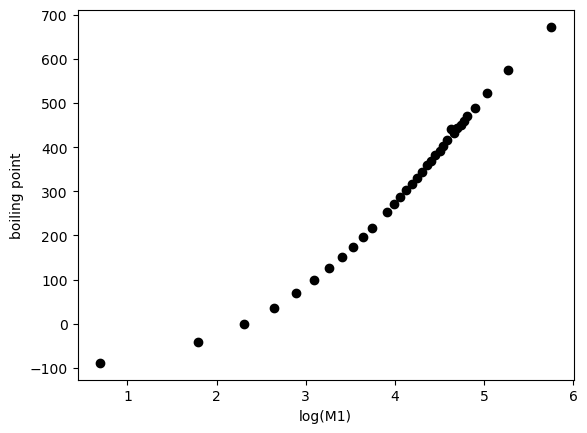

In [20]:
plt.scatter(df_chains.M1_log, df_chains.boiling_point, color='black')
plt.xlabel("log(M1)")
plt.ylabel("boiling point")
# plt.scatter(df.M2, df.boiling_point, color='red', label='M2')
# plt.legend()
plt.title("")
plt.show()

In [21]:
df_chains[df_chains['M1_log'] > 5.5]

,name,boiling_point,SMILES,IUPAC_name,CID,molecular_formula,M1,M2,InChIKey,num_atoms,M1_log,M2_log,atom_count_log
89,Octacontane,672.0,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,octacontane,15043591,C80H162,314,312,OVINWRTYCHUVDD-UHFFFAOYSA-N,80,5.749393,5.743003,4.382027


In [22]:
df.sort_values('num_atoms', ascending=False).head()

,name,boiling_point,SMILES,IUPAC_name,CID,molecular_formula,M1,M2,InChIKey,num_atoms,M1_log,M2_log
89,Octacontane,672.0,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,octacontane,15043591,C80H162,314,312,OVINWRTYCHUVDD-UHFFFAOYSA-N,80,5.749393,5.743003
93,Pentacontane,575.0,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,pentacontane,81067,C50H102,194,192,PFLUOWJPZLHUEA-UHFFFAOYSA-N,50,5.267858,5.257495
103,Tetracontane,522.0,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,tetracontane,20149,C40H82,154,152,KUPLEGDPSCCPJI-UHFFFAOYSA-N,40,5.036953,5.023881
100,Pentatriacontane,489.0,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,pentatriacontane,12413,C35H72,134,132,VHQQPFLOGSTQPC-UHFFFAOYSA-N,35,4.897840,4.882802
40,Dotriacontane,470.0,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,dotriacontane,11008,C32H66,122,120,QHMGJGNTMQDRQA-UHFFFAOYSA-N,32,4.804021,4.787492


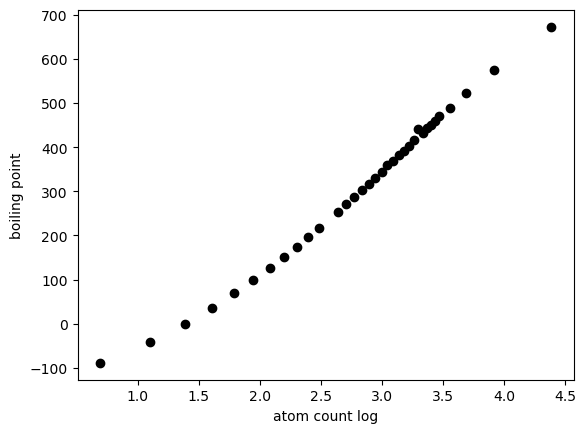

In [23]:
plt.scatter(df_chains.atom_count_log, df_chains.boiling_point, color='black')
plt.xlabel("atom count log")
plt.ylabel("boiling point")
# plt.scatter(df.M2, df.boiling_point, color='red', label='M2')
# plt.legend()
plt.title("")
plt.show()

In [24]:
reg_ch_ac = LinearRegression()
reg_ch_ac.fit(df_chains[['atom_count_log']], df_chains['boiling_point'])

LinearRegression()

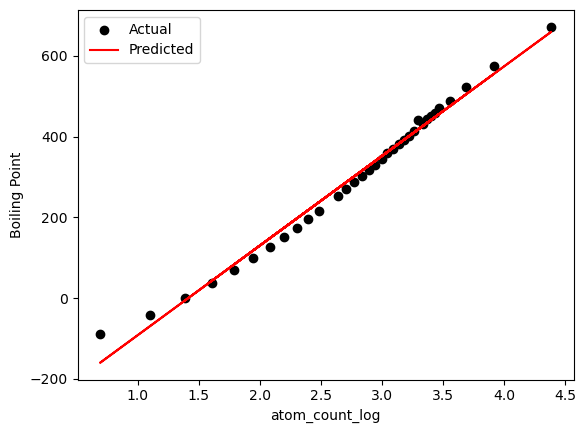

In [25]:
predicted_boiling_points_ch_ac = reg_ch_ac.predict(df_chains[['atom_count_log']])
plt.scatter(df_chains['atom_count_log'], df_chains['boiling_point'], color='black', label='Actual')
plt.plot(df_chains['atom_count_log'], predicted_boiling_points_ch_ac, color='red', label='Predicted')
plt.xlabel('atom_count_log')
plt.ylabel('Boiling Point')
plt.legend()
plt.show()

log of atom count is visibly better for predicting the boiling point of n-alkanes than the Zagreb index

## Predicting the difference between branched alkane and its n-isomer

In [26]:
df_branched = df[df['SMILES'].str.contains(r'\(')].copy()

In [27]:
df_branched['n_isomer_bp'] = df_branched['num_atoms'].map(df_chains.set_index('num_atoms')['boiling_point'])

In [28]:
df_branched[df_branched['n_isomer_bp'].isna()]

,name,boiling_point,SMILES,IUPAC_name,CID,molecular_formula,M1,M2,InChIKey,num_atoms,M1_log,M2_log,n_isomer_bp


In [29]:
df_branched['bp_diff'] = df_branched['n_isomer_bp'] - df_branched['boiling_point']

In [30]:
df_branched.head(3)

,name,boiling_point,SMILES,IUPAC_name,CID,molecular_formula,M1,M2,InChIKey,num_atoms,M1_log,M2_log,n_isomer_bp,bp_diff
4,5-Butyldocosane,244.0,CCCCCCCCCCCCCCCCCC(CCCC)CCCC,5-butyldocosane,143267,C26H54,100,100,CSRNPDQIQWQJCM-UHFFFAOYSA-N,26,4.605170,4.605170,415.0,171.0
5,11-Butyldocosane,242.5,CCCCCCCCCCCC(CCCC)CCCCCCCCCC,11-butyldocosane,139473,C26H54,100,100,HEUYLTACOIADBB-UHFFFAOYSA-N,26,4.605170,4.605170,415.0,172.5
6,11-Decylheneicosane,282.0,CCCCCCCCCCC(CCCCCCCCCC)CCCCCCCCCC,11-decylhenicosane,143269,C31H64,120,120,BCWYKEQUGMQGAP-UHFFFAOYSA-N,31,4.787492,4.787492,458.0,176.0


In [31]:
df_branched_train, df_branched_test = train_test_split(df_branched, test_size=0.2, random_state=random_seed)

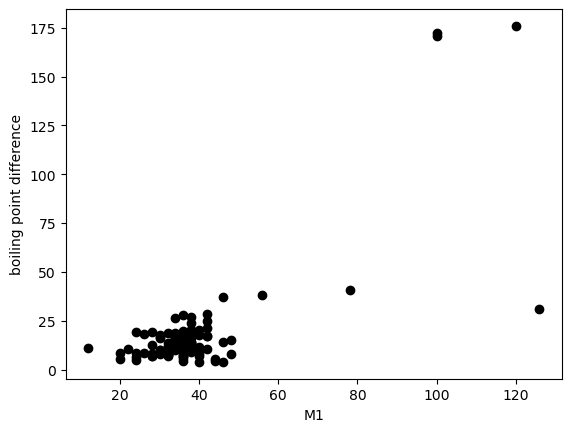

In [32]:
plt.scatter(df_branched.M1, df_branched.bp_diff, color='black')
plt.xlabel("M1")
plt.ylabel("boiling point difference")
plt.title("")
plt.show()

Zagreb index on its own is unusable for linear regression

### Normalized Zagreb index

In [33]:
df_branched['M1_norm'] = df_branched['M1']/df_branched['num_atoms']

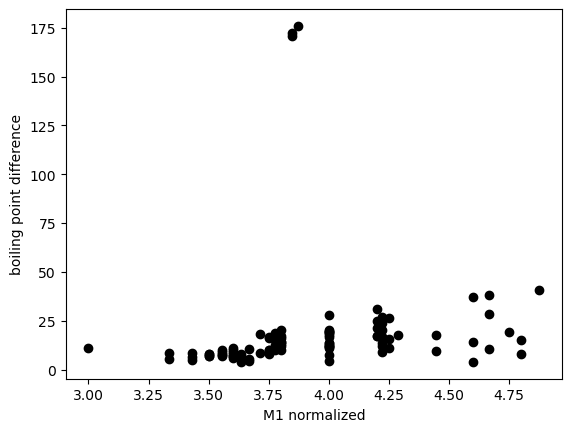

In [34]:
plt.scatter(df_branched.M1_norm, df_branched.bp_diff, color='black')
plt.xlabel("M1 normalized")
plt.ylabel("boiling point difference")
plt.title("")
plt.show()

In [35]:
from mordred import descriptors, Calculator
from rdkit import Chem

calc = Calculator(descriptors.WienerIndex.WienerIndex(polarity=False), ignore_3D=True)

In [36]:
mol = Chem.MolFromSmiles('C(C)CC(C)CC(C)CC(C)CC(C)CC(C)CC(C)C')
calc(mol)[0]

1162

In [37]:
df_branched['W'] = df_branched['SMILES'].apply(lambda x: calc((Chem.MolFromSmiles(x)))[0])

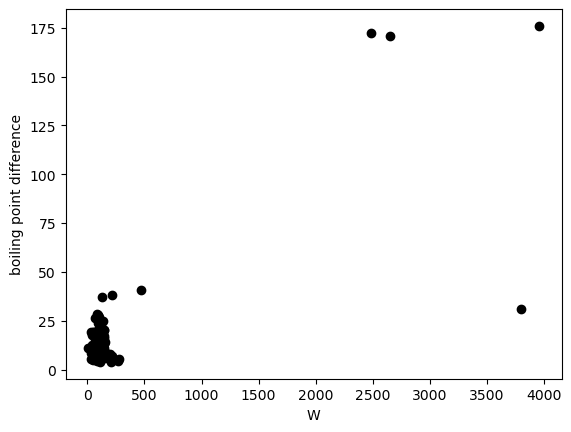

In [38]:
plt.scatter(df_branched.W, df_branched.bp_diff, color='black')
plt.xlabel("W")
plt.ylabel("boiling point difference")
plt.title("")
plt.show()

## Polynomial fit
both branched and not branched

In [39]:
X_train = df_train[['M1']]
y_train = df_train['boiling_point']
X_val = df_val[['M1']]
y_val = df_val['boiling_point']

In [40]:
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
model = LinearRegression().fit(X_train_poly, y_train)

In [41]:
y_train_pred = model.predict(X_train_poly)
y_val_pred = model.predict(X_val_poly)

In [42]:
train_rmse = root_mean_squared_error(y_train, y_train_pred)
val_rmse = root_mean_squared_error(y_val, y_val_pred)
print(train_rmse, val_rmse)

34.21756074065575 32.16174963676457


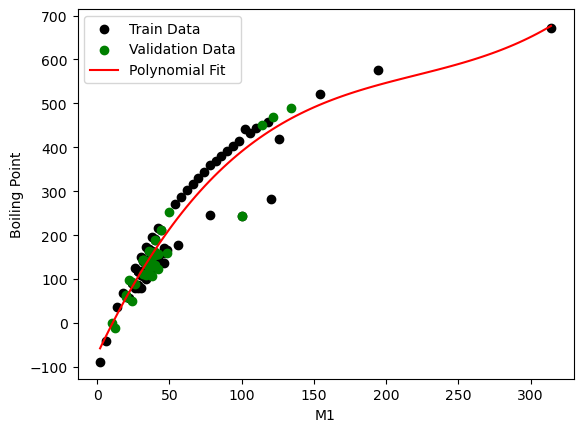

In [43]:
plt.scatter(X_train, y_train, label='Train Data', color='black')
plt.scatter(X_val, y_val, label='Validation Data', color='green')
x_fit = np.linspace(X_train.min().values[0], X_train.max().values[0], 100).reshape(-1, 1)
x_fit_df = pd.DataFrame(x_fit, columns=['M1'])
y_fit = model.predict(poly.transform(x_fit_df))
plt.plot(x_fit, y_fit, color='red', label='Polynomial Fit')
plt.xlabel('M1')
plt.ylabel('Boiling Point')
plt.legend()
plt.show()

## Polynomial fit on log(M1)

In [44]:
X_train = df_train[['M1_log']]
y_train = df_train['boiling_point']
X_val = df_val[['M1_log']]
y_val = df_val['boiling_point']

In [45]:
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
model = LinearRegression().fit(X_train_poly, y_train)

In [46]:
y_train_pred = model.predict(X_train_poly)
y_val_pred = model.predict(X_val_poly)

In [47]:
train_rmse = root_mean_squared_error(y_train, y_train_pred)
val_rmse = root_mean_squared_error(y_val, y_val_pred)
print(train_rmse, val_rmse)

34.87900285764042 32.59591005375144


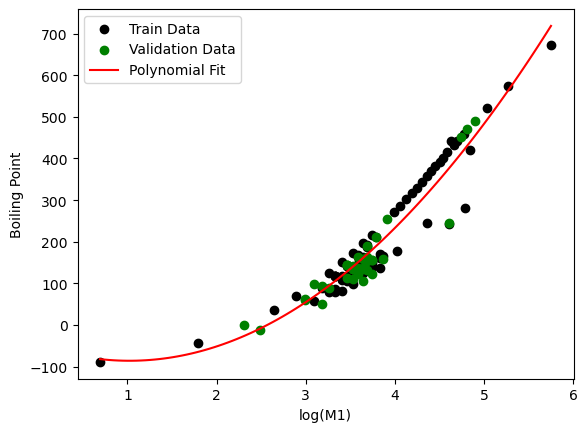

In [48]:
plt.scatter(X_train, y_train, label='Train Data', color='black')
plt.scatter(X_val, y_val, label='Validation Data', color='green')
x_fit = np.linspace(X_train.min().values[0], X_train.max().values[0], 100).reshape(-1, 1)
x_fit_df = pd.DataFrame(x_fit, columns=['M1_log'])
y_fit = model.predict(poly.transform(x_fit_df))
plt.plot(x_fit, y_fit, color='red', label='Polynomial Fit')
plt.xlabel('log(M1)')
plt.ylabel('Boiling Point')
plt.legend()
plt.show()

# Fits for n alkanes

In [49]:
df_chains = df_chains.copy()
df_chains['num_atoms_log'] = df_chains.num_atoms.apply(math.log)
df_chains.head()

,name,boiling_point,SMILES,IUPAC_name,CID,molecular_formula,M1,M2,InChIKey,num_atoms,M1_log,M2_log,atom_count_log,num_atoms_log
0,Butane,-0.5,CCCC,butane,7843,C4H10,10,8,IJDNQMDRQITEOD-UHFFFAOYSA-N,4,2.302585,2.079442,1.386294,1.386294
1,Dodecane,216.3,CCCCCCCCCCCC,dodecane,8182,C12H26,42,40,SNRUBQQJIBEYMU-UHFFFAOYSA-N,12,3.737670,3.688879,2.484907,2.484907
2,Propane,-42.1,CCC,propane,6334,C3H8,6,4,ATUOYWHBWRKTHZ-UHFFFAOYSA-N,3,1.791759,1.386294,1.098612,1.098612
3,Ethane,-88.6,CC,ethane,6324,C2H6,2,1,OTMSDBZUPAUEDD-UHFFFAOYSA-N,2,0.693147,0.000000,0.693147,0.693147
39,Docosane,369.0,CCCCCCCCCCCCCCCCCCCCCC,docosane,12405,C22H46,82,80,HOWGUJZVBDQJKV-UHFFFAOYSA-N,22,4.406719,4.382027,3.091042,3.091042


In [50]:
df_chains_train, df_chains_val = train_test_split(df_chains, test_size=0.3, random_state=random_seed)

In [51]:
def get_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val):
    return (root_mean_squared_error(y_true_train, y_pred_train), root_mean_squared_error(y_true_val,  y_pred_val), r2_score(y_true_train, y_pred_train), r2_score(y_true_val,  y_pred_val))

### Linear regression

In [52]:
reg_chains = LinearRegression()
reg_chains.fit(df_chains_train[['M1_log']], df_chains_train['boiling_point'])

LinearRegression()

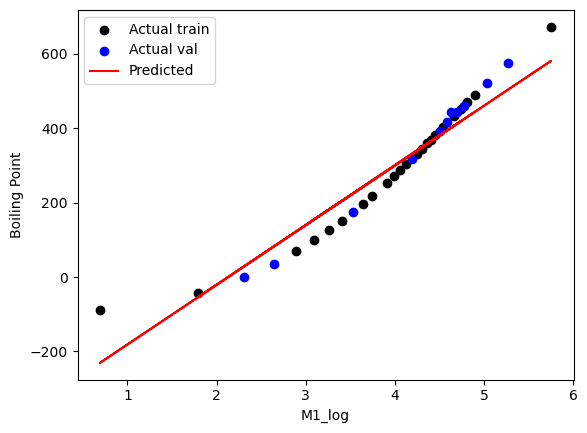

In [53]:
predicted_boiling_points_chains = reg_chains.predict(df_chains_train[['M1_log']])
plt.scatter(df_chains_train['M1_log'], df_chains_train['boiling_point'], color='black', label='Actual train')
plt.scatter(df_chains_val['M1_log'], df_chains_val['boiling_point'], color='blue', label='Actual val')

plt.plot(df_chains_train['M1_log'], predicted_boiling_points_chains, color='red', label='Predicted')
plt.xlabel('M1_log')
plt.ylabel('Boiling Point')
plt.legend()
plt.show()

In [54]:
def print_metrics(y_true_train, y_pred_train, y_true_val, y_pred_val):
    print("Metrics:")
    print("RMSE train: ", root_mean_squared_error(y_true_train, y_pred_train))
    print("RMSE validation: ", root_mean_squared_error(y_true_val,  y_pred_val))
    print("R2 score train: ", r2_score(y_true_train, y_pred_train))
    print("R2 score validation: ", r2_score(y_true_val,  y_pred_val))

In [55]:
print_metrics(df_chains_train['boiling_point'], reg_chains.predict(df_chains_train[['M1_log']]), df_chains_val['boiling_point'], reg_chains.predict(df_chains_val[['M1_log']]))

Metrics:
RMSE train:  47.91707320911615
RMSE validation:  40.794118401497165
R2 score train:  0.9247169096422855
R2 score validation:  0.9502343738770918


In [56]:
metrics_M1_log_lr = get_metrics(df_chains_train['boiling_point'], reg_chains.predict(df_chains_train[['M1_log']]), df_chains_val['boiling_point'], reg_chains.predict(df_chains_val[['M1_log']]))

### Polynomial fit

In [57]:
X_chains_train = df_chains_train[['M1']]
y_chains_train = df_chains_train['boiling_point']
X_chains_val = df_chains_val[['M1']]
y_chains_val = df_chains_val['boiling_point']

In [58]:
degree = 2
poly = PolynomialFeatures(degree=degree)
X_chains_train_poly = poly.fit_transform(X_chains_train)
X_chains_val_poly = poly.transform(X_chains_val)
model_chains = LinearRegression().fit(X_chains_train_poly, y_chains_train)
y_chains_train_pred = model_chains.predict(X_chains_train_poly)
y_chains_val_pred = model_chains.predict(X_chains_val_poly)

In [59]:
print_metrics(y_chains_train, y_chains_train_pred,y_chains_val, y_chains_val_pred)

Metrics:
RMSE train:  26.316139944787494
RMSE validation:  35.31260059160553
R2 score train:  0.9772929222871375
R2 score validation:  0.9627098806843485


In [60]:
metrics_M1_pf = get_metrics(y_chains_train, y_chains_train_pred,y_chains_val, y_chains_val_pred)

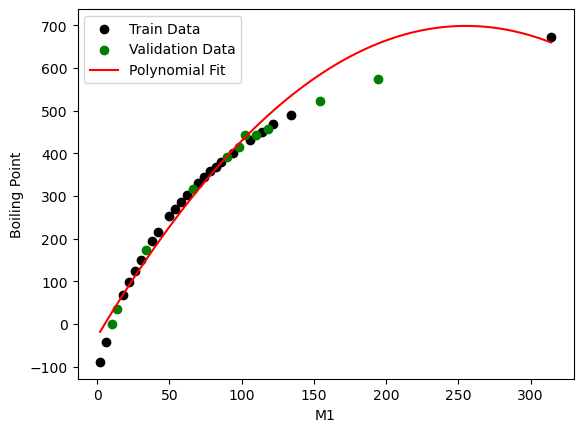

In [61]:
plt.scatter(X_chains_train, y_chains_train, label='Train Data', color='black')
plt.scatter(X_chains_val, y_chains_val, label='Validation Data', color='green')
x_fit = np.linspace(X_chains_train.min().values[0], X_chains_train.max().values[0], 100).reshape(-1, 1)
x_fit_df = pd.DataFrame(x_fit, columns=['M1'])
y_fit = model_chains.predict(poly.transform(x_fit_df))
plt.plot(x_fit, y_fit, color='red', label='Polynomial Fit')
plt.xlabel('M1')
plt.ylabel('Boiling Point')
plt.legend()
plt.show()

In [62]:
# Degree 3 has batter metrics for training dataset, but way worse for validation

In [63]:
X_chains_train = df_chains_train[['M1_log']]
y_chains_train = df_chains_train['boiling_point']
X_chains_val = df_chains_val[['M1_log']]
y_chains_val = df_chains_val['boiling_point']

In [64]:
degree = 3
poly = PolynomialFeatures(degree=degree)
X_chains_train_poly = poly.fit_transform(X_chains_train)
X_chains_val_poly = poly.transform(X_chains_val)
model_chains = LinearRegression().fit(X_chains_train_poly, y_chains_train)
y_chains_train_pred = model_chains.predict(X_chains_train_poly)
y_chains_val_pred = model_chains.predict(X_chains_val_poly)

In [65]:
print_metrics(y_chains_train, y_chains_train_pred,y_chains_val, y_chains_val_pred)

Metrics:
RMSE train:  7.0219055859976915
RMSE validation:  10.128671353477312
R2 score train:  0.9983833096596867
R2 score validation:  0.9969321132209723


In [66]:
metrics_M1_log_pf = get_metrics(y_chains_train, y_chains_train_pred,y_chains_val, y_chains_val_pred)

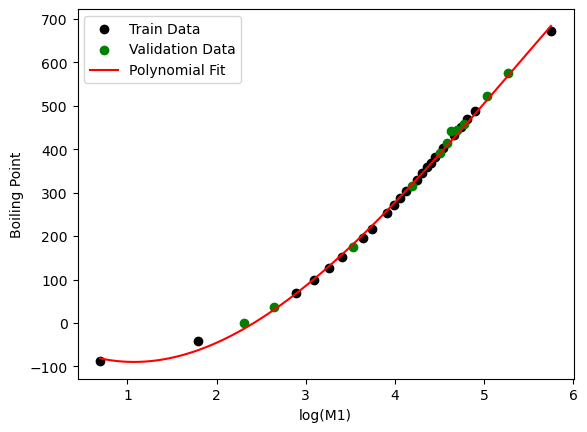

In [67]:
plt.scatter(X_chains_train, y_chains_train, label='Train Data', color='black')
plt.scatter(X_chains_val, y_chains_val, label='Validation Data', color='green')
x_fit = np.linspace(X_chains_train.min().values[0], X_chains_train.max().values[0], 100).reshape(-1, 1)
x_fit_df = pd.DataFrame(x_fit, columns=['M1_log'])
y_fit = model_chains.predict(poly.transform(x_fit_df))
plt.plot(x_fit, y_fit, color='red', label='Polynomial Fit')
plt.xlabel('log(M1)')
plt.ylabel('Boiling Point')
plt.legend()
plt.show()

### Comparison with number of atoms

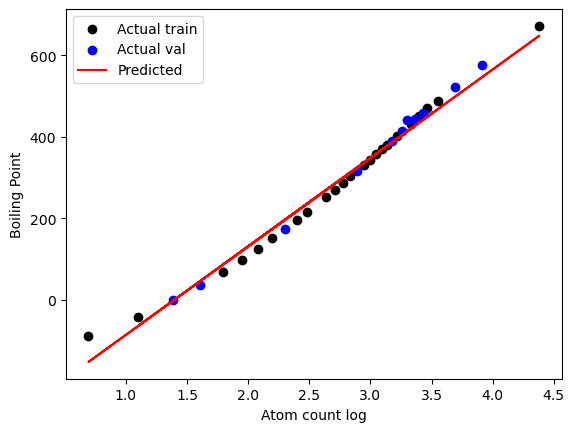

In [68]:
reg_chains = LinearRegression()
reg_chains.fit(df_chains_train[['num_atoms_log']], df_chains_train['boiling_point'])
predicted_boiling_points_chains = reg_chains.predict(df_chains_train[['num_atoms_log']])

plt.scatter(df_chains_train['num_atoms_log'], df_chains_train['boiling_point'], color='black', label='Actual train')
plt.scatter(df_chains_val['num_atoms_log'], df_chains_val['boiling_point'], color='blue', label='Actual val')

plt.plot(df_chains_train['num_atoms_log'], predicted_boiling_points_chains, color='red', label='Predicted')
plt.xlabel('Atom count log')
plt.ylabel('Boiling Point')
plt.legend()
plt.show()

In [69]:
print_metrics(df_chains_train['boiling_point'], reg_chains.predict(df_chains_train[['num_atoms_log']]), df_chains_val['boiling_point'], reg_chains.predict(df_chains_val[['num_atoms_log']]))

Metrics:
RMSE train:  20.678964205658726
RMSE validation:  18.117955851097584
R2 score train:  0.9859791470406981
R2 score validation:  0.9901835883434694


In [70]:
metrics_ac_log_lr = get_metrics(df_chains_train['boiling_point'], reg_chains.predict(df_chains_train[['num_atoms_log']]), df_chains_val['boiling_point'], reg_chains.predict(df_chains_val[['num_atoms_log']]))

In [71]:
X_chains_train = df_chains_train[['num_atoms']]
y_chains_train = df_chains_train['boiling_point']
X_chains_val = df_chains_val[['num_atoms']]
y_chains_val = df_chains_val['boiling_point']

degree = 2
poly = PolynomialFeatures(degree=degree)
X_chains_train_poly = poly.fit_transform(X_chains_train)
X_chains_val_poly = poly.transform(X_chains_val)
model_chains = LinearRegression().fit(X_chains_train_poly, y_chains_train)
y_chains_train_pred = model_chains.predict(X_chains_train_poly)
y_chains_val_pred = model_chains.predict(X_chains_val_poly)

print_metrics(y_chains_train, y_chains_train_pred,y_chains_val, y_chains_val_pred)

Metrics:
RMSE train:  26.316139944787487
RMSE validation:  35.31260059160259
R2 score train:  0.9772929222871375
R2 score validation:  0.9627098806843547


In [72]:
metrics_ac_pf = get_metrics(y_chains_train, y_chains_train_pred,y_chains_val, y_chains_val_pred)

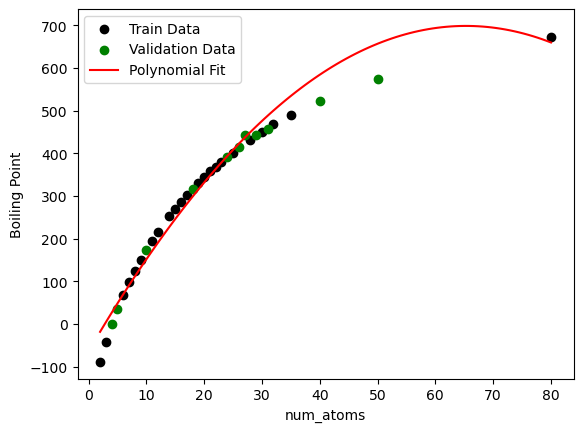

In [73]:
plt.scatter(X_chains_train, y_chains_train, label='Train Data', color='black')
plt.scatter(X_chains_val, y_chains_val, label='Validation Data', color='green')
x_fit = np.linspace(X_chains_train.min().values[0], X_chains_train.max().values[0], 100).reshape(-1, 1)
x_fit_df = pd.DataFrame(x_fit, columns=['num_atoms'])
y_fit = model_chains.predict(poly.transform(x_fit_df))
plt.plot(x_fit, y_fit, color='red', label='Polynomial Fit')
plt.xlabel('num_atoms')
plt.ylabel('Boiling Point')
plt.legend()
plt.show()

In [74]:
X_chains_train = df_chains_train[['num_atoms_log']]
y_chains_train = df_chains_train['boiling_point']
X_chains_val = df_chains_val[['num_atoms_log']]
y_chains_val = df_chains_val['boiling_point']

degree = 3
poly = PolynomialFeatures(degree=degree)
X_chains_train_poly = poly.fit_transform(X_chains_train)
X_chains_val_poly = poly.transform(X_chains_val)
model_chains = LinearRegression().fit(X_chains_train_poly, y_chains_train)
y_chains_train_pred = model_chains.predict(X_chains_train_poly)
y_chains_val_pred = model_chains.predict(X_chains_val_poly)

print_metrics(y_chains_train, y_chains_train_pred,y_chains_val, y_chains_val_pred)

Metrics:
RMSE train:  2.600050535130208
RMSE validation:  7.007282148447759
R2 score train:  0.9997783435108983
R2 score validation:  0.9985316365088902


In [75]:
metrics_ac_log_pf = get_metrics(y_chains_train, y_chains_train_pred,y_chains_val, y_chains_val_pred)

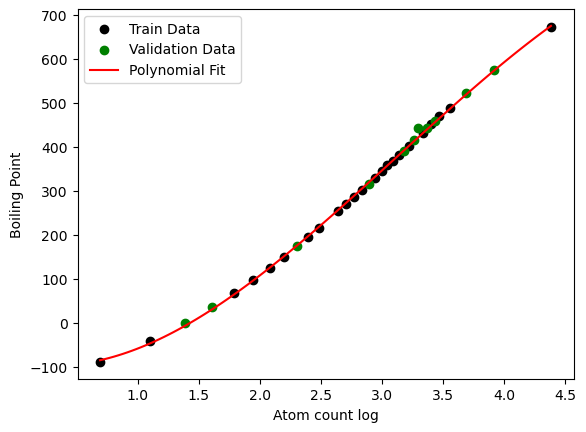

In [76]:
plt.scatter(X_chains_train, y_chains_train, label='Train Data', color='black')
plt.scatter(X_chains_val, y_chains_val, label='Validation Data', color='green')
x_fit = np.linspace(X_chains_train.min().values[0], X_chains_train.max().values[0], 100).reshape(-1, 1)
x_fit_df = pd.DataFrame(x_fit, columns=['num_atoms_log'])
y_fit = model_chains.predict(poly.transform(x_fit_df))
plt.plot(x_fit, y_fit, color='red', label='Polynomial Fit')
plt.xlabel('Atom count log')
plt.ylabel('Boiling Point')
plt.legend()
plt.show()

coefficients: [  0.         -62.03708371 101.42174779 -10.86290582]
intercept: -86.83933966638796


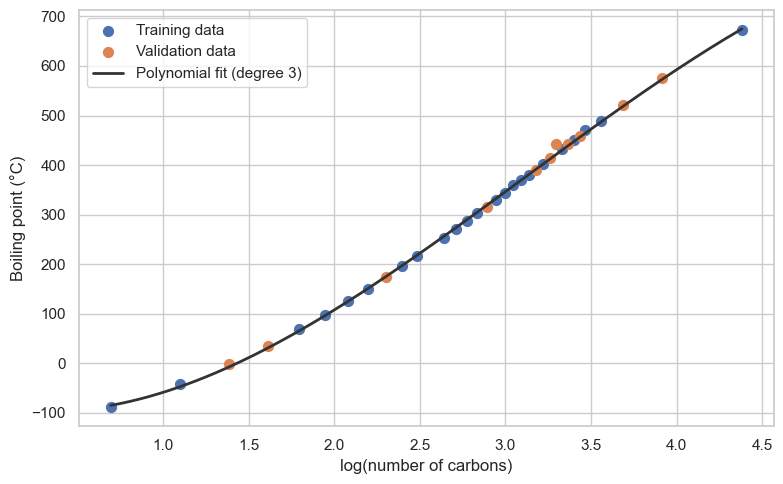

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn style
sns.set(style='whitegrid')

# Custom colors
train_color = '#4C72B0'
val_color = '#DD8452'
fit_color = '#333333'

# Prepare fit line
x_fit = np.linspace(X_chains_train.min().values[0], X_chains_train.max().values[0], 200).reshape(-1, 1)
x_fit_df = pd.DataFrame(x_fit, columns=['num_atoms_log'])
y_fit = model_chains.predict(poly.transform(x_fit_df))

print("coefficients:", model_chains.coef_)
print("intercept:", model_chains.intercept_)

# Create plot
plt.figure(figsize=(8, 5))

# Scatter plots
plt.scatter(X_chains_train, y_chains_train, label='Training data', color=train_color, s=50, alpha=1)
plt.scatter(X_chains_val, y_chains_val, label='Validation data', color=val_color, s=50, alpha=1)

# Polynomial fit
plt.plot(x_fit, y_fit, color=fit_color, label='Polynomial fit (degree 3)', linewidth=2)

# Labels and title
plt.xlabel('log(number of carbons)', fontsize=12)
plt.ylabel('Boiling point (°C)', fontsize=12)
# plt.title('Polynomial Regression Fit for Boiling Point Prediction', fontsize=14)

# Legend and layout
plt.legend(fontsize=11)
plt.tight_layout()

# Save or show
# plt.savefig("boiling_point_fit.png", dpi=300)
plt.savefig("../img/chains_bp_poly_fit.svg", format="svg")

plt.show()


In [78]:
print("Intercept:", model_chains.intercept_)
print("Coefficients:", model_chains.coef_)

Intercept: -86.83933966638796
Coefficients: [  0.         -62.03708371 101.42174779 -10.86290582]


In [79]:
feature_names = poly.get_feature_names_out(['num_atoms_log'])
for name, coef in zip(feature_names, model_chains.coef_):
    print(f"{name}: {coef}")

1: 0.0
num_atoms_log: -62.03708370528341
num_atoms_log^2: 101.42174779188932
num_atoms_log^3: -10.862905820924366


In [80]:
df_chains_val[df_chains_val['num_atoms_log'] > 4]

,name,boiling_point,SMILES,IUPAC_name,CID,molecular_formula,M1,M2,InChIKey,num_atoms,M1_log,M2_log,atom_count_log,num_atoms_log


## Comparison table

In [81]:
data = {
    'Descriptor': ['M1', 'M1', 'M1', 'Atom count', 'Atom count', 'Atom count'],
    'Fit': ['Linear regression on log', 'Polynomial fit', 'Polynomial fit on log'] * 2,
    'RMSE train': [metrics_M1_log_lr[0], metrics_M1_pf[0], metrics_M1_log_pf[0], metrics_ac_log_lr[0], metrics_ac_pf[0], metrics_ac_log_pf[0]],
    'RMSE val': [metrics_M1_log_lr[1],metrics_M1_pf[1],metrics_M1_log_pf[1],metrics_ac_log_lr[1], metrics_ac_pf[1], metrics_ac_log_pf[1]],
    'R2 train': [metrics_M1_log_lr[2],metrics_M1_pf[2],metrics_M1_log_pf[2],metrics_ac_log_lr[2], metrics_ac_pf[2],metrics_ac_log_pf[2]],
    'R2 val': [metrics_M1_log_lr[3],metrics_M1_pf[3],metrics_M1_log_pf[3],metrics_ac_log_lr[3],metrics_ac_pf[3],metrics_ac_log_pf[3]],
}

df_table = pd.DataFrame(data)

def highlight_best_worst(s):
    if 'RMSE' in s.name: 
        is_best = s == s.min()
    elif 'R2' in s.name:
        is_best = s == s.max()

    return ['background-color: #228B22' if v else '' for v in is_best]

styled_df = df_table.style.apply(highlight_best_worst, subset=['RMSE train', 'RMSE val', 'R2 train', 'R2 val'])
styled_df

,Descriptor,Fit,RMSE train,RMSE val,R2 train,R2 val
0,M1,Linear regression on log,47.917073,40.794118,0.924717,0.950234
1,M1,Polynomial fit,26.316140,35.312601,0.977293,0.962710
2,M1,Polynomial fit on log,7.021906,10.128671,0.998383,0.996932
3,Atom count,Linear regression on log,20.678964,18.117956,0.985979,0.990184
4,Atom count,Polynomial fit,26.316140,35.312601,0.977293,0.962710
5,Atom count,Polynomial fit on log,2.600051,7.007282,0.999778,0.998532


### Conclusion:
Atom count works better than Zagreb index for all models.